In [1]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt


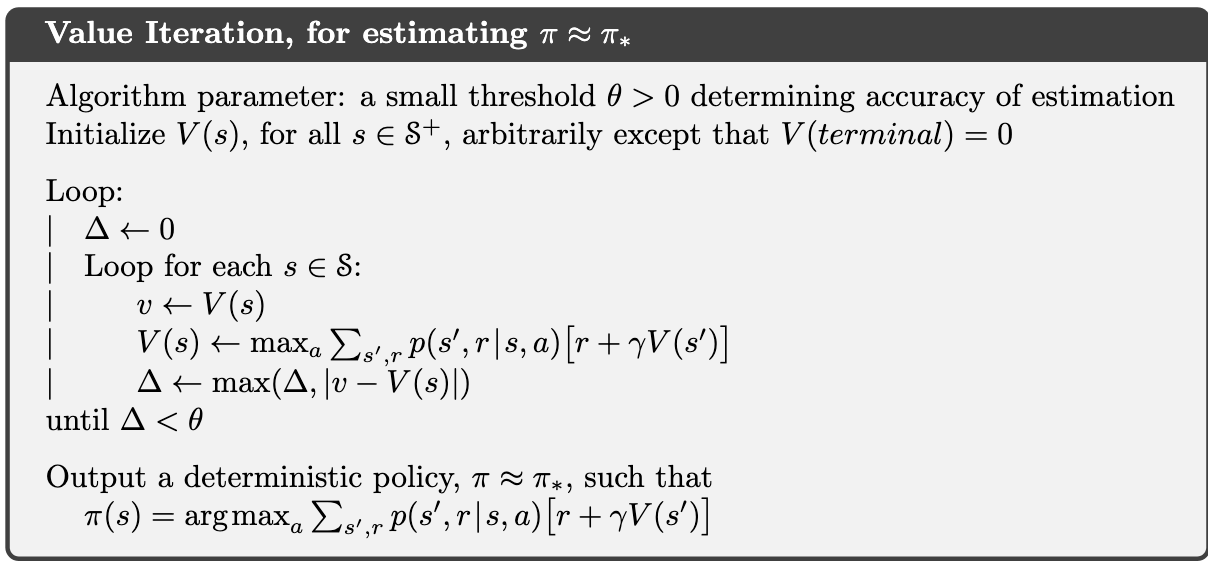

In [3]:
def value_iteration(env, discount_factor, theta):
    nS = env.observation_space.n
    nA = env.action_space.n
    P = env.P
    policy = np.ones([nS, nA])/nA
    V = np.zeros(nS)

    while(True):
        delta = 0
        for s in range(nS):
            v = V[s]
            action_values = np.zeros(nA)
            for a in range(nA):
                for prob, s_prime, reward, done in P[s][a]:
                    if done:
                        action_values[a] += prob * (reward)
                    else:
                        action_values[a] += prob * (reward + discount_factor * V[s_prime])
            V[s] = max(action_values)
            new_action = np.argmax(action_values)
            for a in range(nA):
                if a == new_action:
                    policy[s][a]=1
                else:
                    policy[s][a]=0
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    
    return policy, V